# Decision Trees and Random Forests

A- Decision Trees:

* Decision Trees are a type of supervised machine learning algorithm used for both classification and regression tasks.
* They work by recursively splitting the data into subsets based on the most significant features.
* At each node of the tree, a decision is made by evaluating a feature's value.
The goal is to create a tree structure that best separates or predicts the target variable.
* Decision Trees can be prone to overfitting, but they are interpretable and can serve as the basis for more advanced ensemble methods.

B- Random Forests:

* Random Forests are an ensemble learning method based on Decision Trees.
They create multiple Decision Trees during training, each with a random subset of the data and features.
* When making predictions, the results from multiple trees are combined (e.g., voting for classification or averaging for regression).
* Random Forests improve the robustness and generalization of the model and reduce the risk of overfitting.
* They are widely used for classification and regression tasks and are known for their accuracy and versatility.

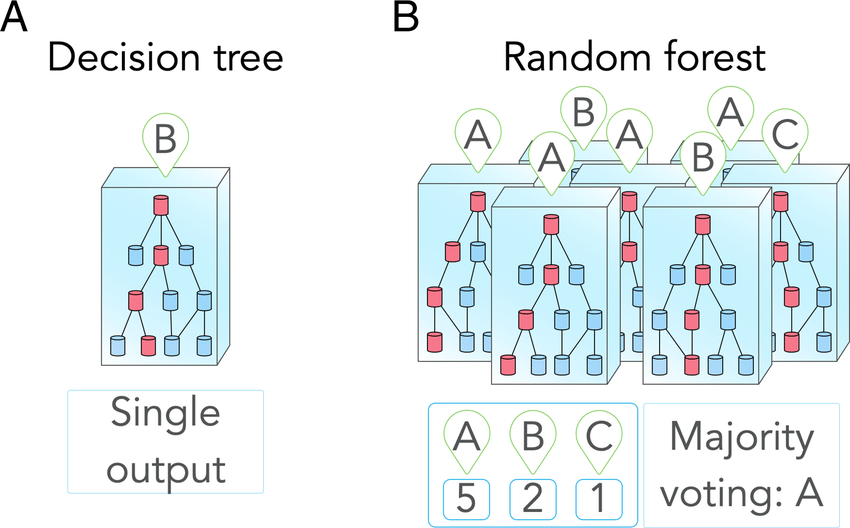

In [1]:
# import the libraries we need
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

The dataset I will be using: [link](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

Data Description: [link](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

In [2]:
# Load the House Prices dataset and view it
df = pd.read_csv('./train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


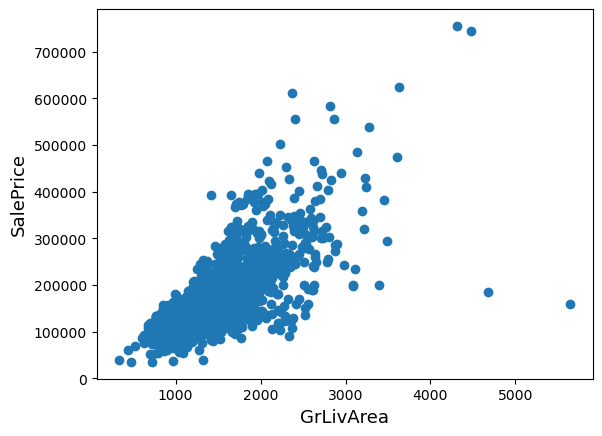

In [3]:
# Delete the outliers -> df['GrLivArea']>4000
df[df.GrLivArea >= 4000]

# plot SalePrice Vs. GrLivArea
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [4]:
# filter the dataset based on the following columns
columns_to_use = ['LotArea', 'YrSold', 'GarageArea', 'GarageYrBlt',
                  'GrLivArea', 'OverallQual', 'MasVnrArea', 'YearBuilt',
                  'MSZoning', 'Neighborhood', 'KitchenQual',
                  'SalePrice']

# save the new dataset into df_sample
df_sample = df[columns_to_use]

In [5]:
# view df_sample
df_sample

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,MasVnrArea,YearBuilt,MSZoning,Neighborhood,KitchenQual,SalePrice
0,8450,2008,548,2003.0,1710,7,196.0,2003,RL,CollgCr,Gd,208500
1,9600,2007,460,1976.0,1262,6,0.0,1976,RL,Veenker,TA,181500
2,11250,2008,608,2001.0,1786,7,162.0,2001,RL,CollgCr,Gd,223500
3,9550,2006,642,1998.0,1717,7,0.0,1915,RL,Crawfor,Gd,140000
4,14260,2008,836,2000.0,2198,8,350.0,2000,RL,NoRidge,Gd,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,2007,460,1999.0,1647,6,0.0,1999,RL,Gilbert,TA,175000
1456,13175,2010,500,1978.0,2073,6,119.0,1978,RL,NWAmes,TA,210000
1457,9042,2010,252,1941.0,2340,7,0.0,1941,RL,Crawfor,Gd,266500
1458,9717,2010,240,1950.0,1078,5,0.0,1950,RL,NAmes,Gd,142125


In [6]:
# look into the number of nulls we have
# (sort the values to have the emptiest column on top)
nulls = df_sample.isnull().sum()

#view nulls
nulls

LotArea          0
YrSold           0
GarageArea       0
GarageYrBlt     81
GrLivArea        0
OverallQual      0
MasVnrArea       8
YearBuilt        0
MSZoning         0
Neighborhood     0
KitchenQual      0
SalePrice        0
dtype: int64

In [7]:
# fillna with mean for: GarageYrBlt, MasVnrArea
mean_GarageYrBlt = df_sample['GarageYrBlt'].mean()
mean_MasVnrArea = df_sample['MasVnrArea'].mean()

df_sample['GarageYrBlt'].fillna(mean_GarageYrBlt, inplace=True)
df_sample['MasVnrArea'].fillna(mean_MasVnrArea, inplace=True)

nulls = df_sample.isnull().sum()

#view nulls
nulls

/var/folders/zg/p7fn91m16k3c924g51v1bzpw0000gn/T/ipykernel_22420/3687331897.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['GarageYrBlt'].fillna(mean_GarageYrBlt, inplace=True)
/var/folders/zg/p7fn91m16k3c924g51v1bzpw0000gn/T/ipykernel_22420/3687331897.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['MasVnrArea'].fillna(mean_MasVnrArea, inplace=True)


LotArea         0
YrSold          0
GarageArea      0
GarageYrBlt     0
GrLivArea       0
OverallQual     0
MasVnrArea      0
YearBuilt       0
MSZoning        0
Neighborhood    0
KitchenQual     0
SalePrice       0
dtype: int64

In [8]:
# create a second dataset from the first dataset
df_transformed = df_sample.copy()


# use ordinal encoder to transform kitchen quality (KitchenQual)
# Ordinal encoding is a preprocessing technique used for converting categorical data into numeric values that preserve their inherent ordering.
from sklearn.preprocessing import OrdinalEncoder

order = ['Fa','TA','Gd','Ex']
ord_en = OrdinalEncoder(categories= [order])
df_transformed['KitchenQual'] = ord_en.fit_transform(df_transformed[['KitchenQual']])

# Specify the columns to be one-hot encoded
columns_to_encode = ['Neighborhood', 'MSZoning']

# Perform one-hot encoding
encoded_df = pd.get_dummies(df_transformed, columns=columns_to_encode)

#View encoded_df
encoded_df

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,MasVnrArea,YearBuilt,KitchenQual,SalePrice,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,8450,2008,548,2003.0,1710,7,196.0,2003,2.0,208500,...,False,False,False,False,False,False,False,False,True,False
1,9600,2007,460,1976.0,1262,6,0.0,1976,1.0,181500,...,False,False,False,False,True,False,False,False,True,False
2,11250,2008,608,2001.0,1786,7,162.0,2001,2.0,223500,...,False,False,False,False,False,False,False,False,True,False
3,9550,2006,642,1998.0,1717,7,0.0,1915,2.0,140000,...,False,False,False,False,False,False,False,False,True,False
4,14260,2008,836,2000.0,2198,8,350.0,2000,2.0,250000,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,2007,460,1999.0,1647,6,0.0,1999,1.0,175000,...,False,False,False,False,False,False,False,False,True,False
1456,13175,2010,500,1978.0,2073,6,119.0,1978,1.0,210000,...,False,False,False,False,False,False,False,False,True,False
1457,9042,2010,252,1941.0,2340,7,0.0,1941,2.0,266500,...,False,False,False,False,False,False,False,False,True,False
1458,9717,2010,240,1950.0,1078,5,0.0,1950,2.0,142125,...,False,False,False,False,False,False,False,False,True,False


In [9]:
# Concatenate encoded_df and df_transfromed['KitchenQual'] into encoded_df
# encoded_df = pd.concat([encoded_df, df_transformed['Kitchen']], axis = 1)

In [10]:
#Check encoded_df data type
encoded_df.dtypes

LotArea                   int64
YrSold                    int64
GarageArea                int64
GarageYrBlt             float64
GrLivArea                 int64
OverallQual               int64
MasVnrArea              float64
YearBuilt                 int64
KitchenQual             float64
SalePrice                 int64
Neighborhood_Blmngtn       bool
Neighborhood_Blueste       bool
Neighborhood_BrDale        bool
Neighborhood_BrkSide       bool
Neighborhood_ClearCr       bool
Neighborhood_CollgCr       bool
Neighborhood_Crawfor       bool
Neighborhood_Edwards       bool
Neighborhood_Gilbert       bool
Neighborhood_IDOTRR        bool
Neighborhood_MeadowV       bool
Neighborhood_Mitchel       bool
Neighborhood_NAmes         bool
Neighborhood_NPkVill       bool
Neighborhood_NWAmes        bool
Neighborhood_NoRidge       bool
Neighborhood_NridgHt       bool
Neighborhood_OldTown       bool
Neighborhood_SWISU         bool
Neighborhood_Sawyer        bool
Neighborhood_SawyerW       bool
Neighbor

In [11]:
#View encoded_df again
encoded_df

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,MasVnrArea,YearBuilt,KitchenQual,SalePrice,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,8450,2008,548,2003.0,1710,7,196.0,2003,2.0,208500,...,False,False,False,False,False,False,False,False,True,False
1,9600,2007,460,1976.0,1262,6,0.0,1976,1.0,181500,...,False,False,False,False,True,False,False,False,True,False
2,11250,2008,608,2001.0,1786,7,162.0,2001,2.0,223500,...,False,False,False,False,False,False,False,False,True,False
3,9550,2006,642,1998.0,1717,7,0.0,1915,2.0,140000,...,False,False,False,False,False,False,False,False,True,False
4,14260,2008,836,2000.0,2198,8,350.0,2000,2.0,250000,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,2007,460,1999.0,1647,6,0.0,1999,1.0,175000,...,False,False,False,False,False,False,False,False,True,False
1456,13175,2010,500,1978.0,2073,6,119.0,1978,1.0,210000,...,False,False,False,False,False,False,False,False,True,False
1457,9042,2010,252,1941.0,2340,7,0.0,1941,2.0,266500,...,False,False,False,False,False,False,False,False,True,False
1458,9717,2010,240,1950.0,1078,5,0.0,1950,2.0,142125,...,False,False,False,False,False,False,False,False,True,False


In [12]:
# create the X and Y where Y is our target column 'SalePrice' and X is everything else.
X = encoded_df.drop('SalePrice', axis = 1)
y = encoded_df['SalePrice']

#Split the dataset into training and testing subsets with test_size=0.2, random_state=42, shuffle=True
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [13]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree model
decision_tree = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
decision_tree.fit(X_train,y_train)


DecisionTreeRegressor(random_state=42)

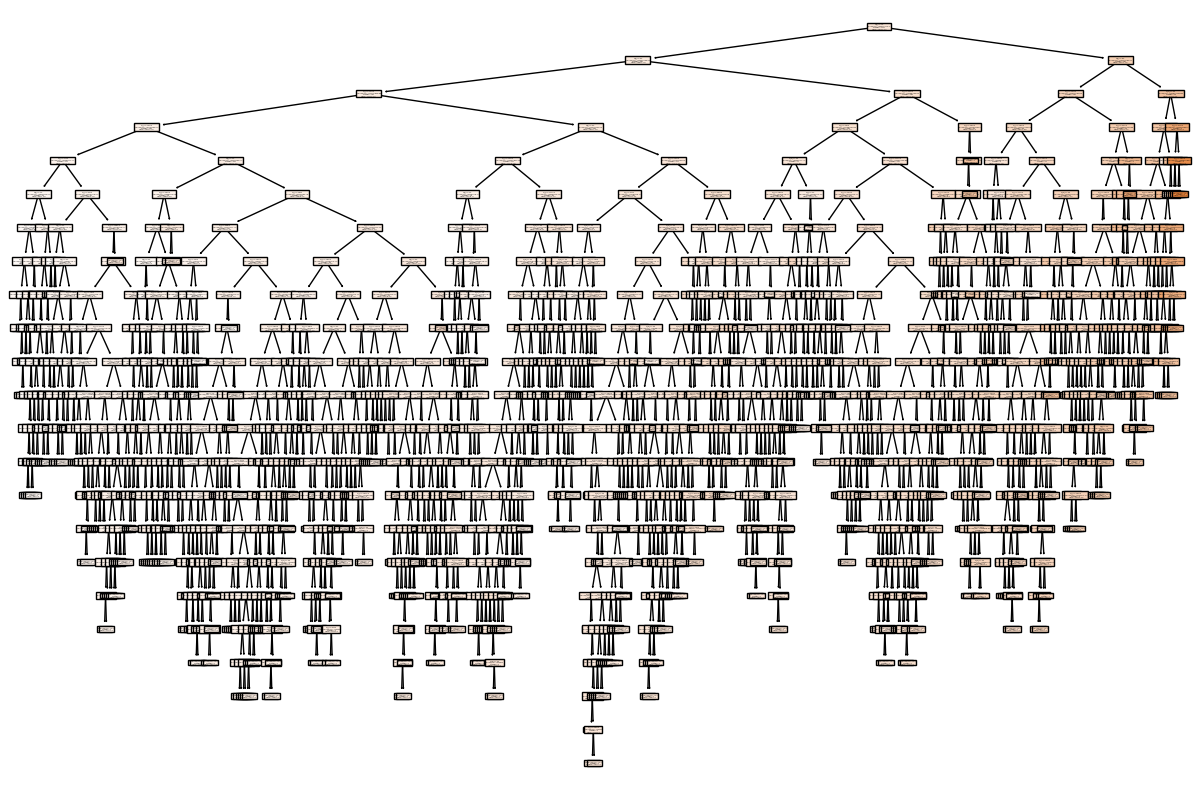

In [15]:
from sklearn.tree import plot_tree

# plot the tree
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, filled=True)
plt.show()


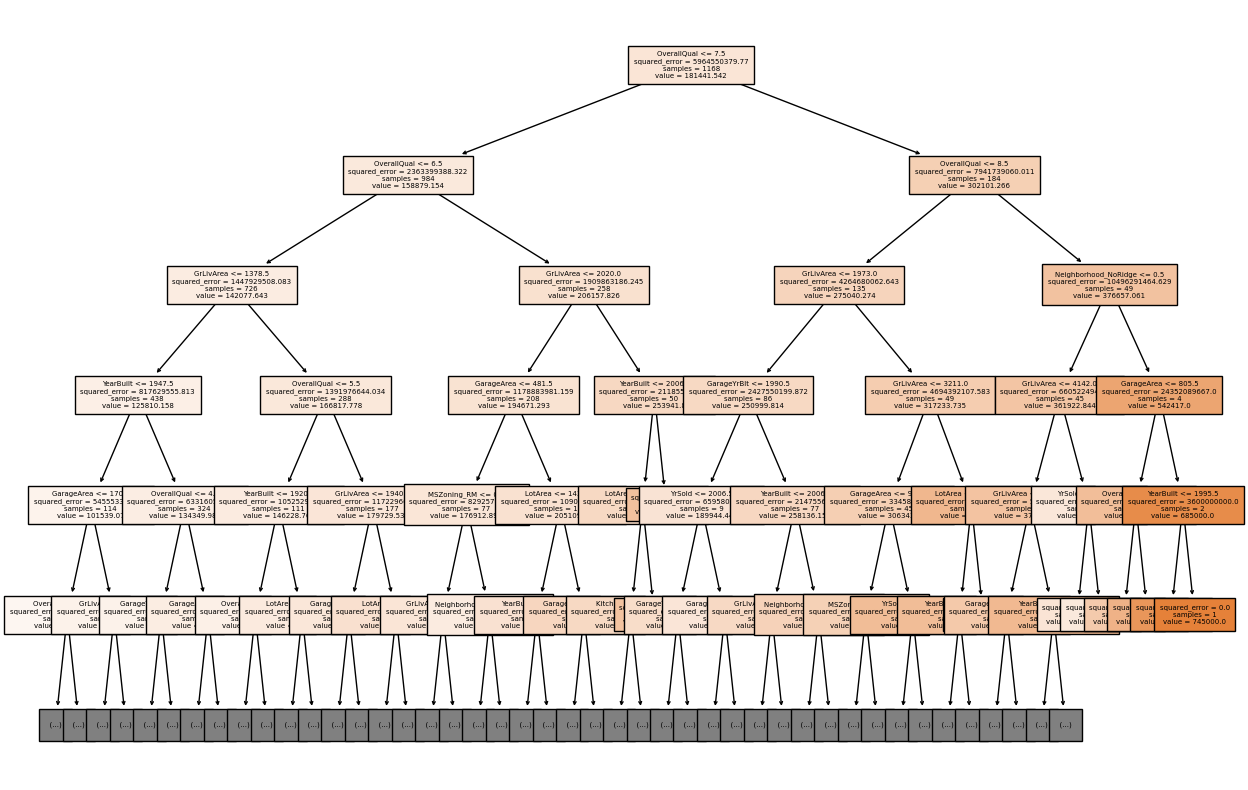

In [ ]:
# change max_depth to see only the first few features and plot the tree again
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, filled=True, feature_names=X.columns, max_depth=5, fontsize=5)
plt.show()


In [16]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest model with n_estimators=100 and random_state=42
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Note on r2 score:**

* r2_score is the proportion of the variance in the dependent variable that is predictable from the independent variable(s)

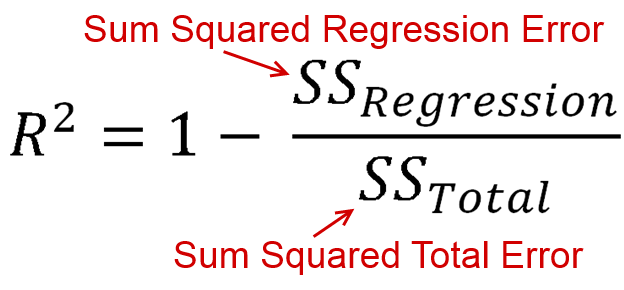

In [18]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluate the Decision Tree performance
y_pred_decision_tree = decision_tree.predict(X_test)
mae_decision_tree = mean_absolute_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

# Evaluate the Random Forest performance
y_pred_random_forest = random_forest.predict(X_test)
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

# Print the results
print("Decision Tree MAE:", mae_decision_tree)
print("Decision Tree R-squared:", r2_decision_tree)
print("Random Forest MAE:", mae_random_forest)
print("Random Forest R-squared:", r2_random_forest)


Decision Tree MAE: 28457.568493150684
Decision Tree R-squared: 0.7598462583298887
Random Forest MAE: 19142.478504566207
Random Forest R-squared: 0.8798607799950457


In [19]:
# Create a Random Forest model with a different number of trees (n_estimators = 200)
random_forest_new = RandomForestRegressor(n_estimators=200, random_state=42)


# Fit the model to the training data
random_forest_new.fit(X_train, y_train)

# Evaluate the new Random Forest model
y_pred_random_forest_new = random_forest_new.predict(X_test)
mae_random_forest_new = mean_absolute_error(y_test, y_pred_random_forest_new)
r2_random_forest_new = r2_score(y_test, y_pred_random_forest_new)

# print the new results
print("Random Forest MAE:", mae_random_forest_new)
print("Random Forest R-squared:", r2_random_forest_new)


Random Forest MAE: 19228.08535388128
Random Forest R-squared: 0.8791643304868556


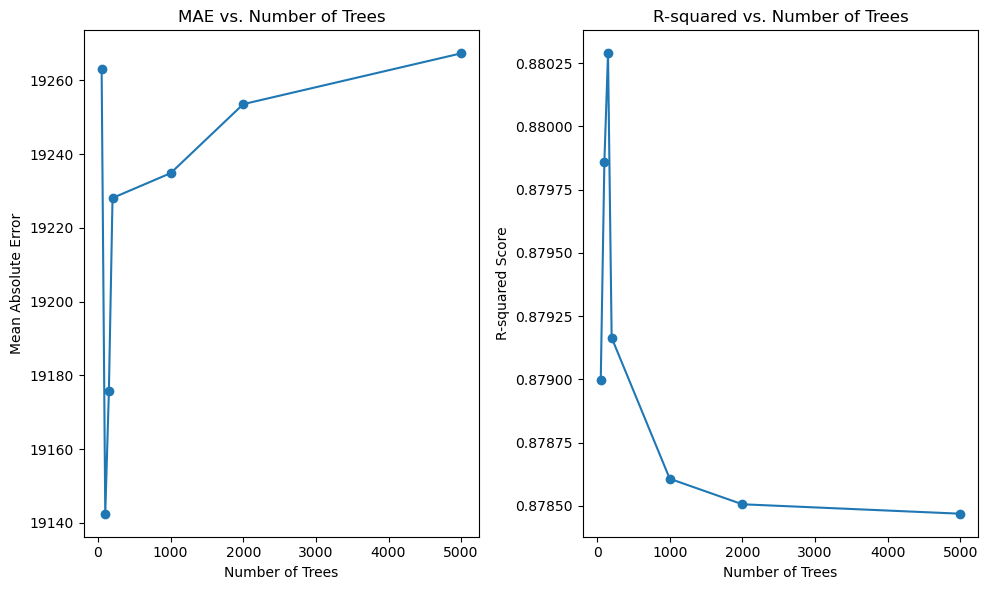

In [21]:
import numpy as np

# Vary the number of trees in the Random Forest to get the best n_estimators value
n_estimators_range = [50, 100, 150, 200, 1000, 2000, 5000]
mae_scores = []
r2_scores = []

for n_estimators in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    y_pred_rf = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred_rf)
    r2 = r2_score(y_test, y_pred_rf)
    mae_scores.append(mae)
    r2_scores.append(r2)

# Plot the results
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, mae_scores, marker='o')
plt.title('MAE vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Absolute Error')

plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, r2_scores, marker='o')
plt.title('R-squared vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('R-squared Score')

plt.tight_layout()
plt.show()


### SVR

Support Vector Machines (SVM) is a machine learning algorithm that can be used for both classification and regression tasks. Support Vector Classification (SVC) and Support Vector Regression (SVR) are two variants of SVM that are specifically tailored for different types of machine learning problems.



In [23]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


# scale the X_train using the StandardScaler() before fitting the algorithm to it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_test)

svc = SVR()
svc.fit(X_train_scaled, y_train)

print("Using StandardScaler")
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on validation set: {:.2f}".format(svc.score(X_val_scaled, y_test)))


Using StandardScaler
Accuracy on training set: -0.04
Accuracy on validation set: -0.02


In [30]:
# Use svr with kernel='rbf', C=1.0, epsilon=0.1
# rbf = Radial Basis Function.
# epsilon = specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value
svm = SVR(kernel='rbf', C=1, epsilon=1).fit(X, y)


# svr prediction
y_pred_svr = svm.predict(X_val_scaled)

/Users/lizhifan/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [26]:
# Calculate the MAE and r2_score


mae = mean_absolute_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)

# Print the results
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 59336.64372621096
R-squared (R2) Score: -0.03232895978373018


**Note on the C hyperparameter and gamma**:

* The “C” hyperparameter controls the strength of the regularization.
A smaller value for “C” (e.g. C=0.01) leads to stronger regularization and a simpler model, while a larger value (e.g. C=1.0) leads to weaker regularization and a more complex model.

* The gamma parameter defines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close'. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

In [32]:
# how to improve the results? Use GridSearchCV
from sklearn.model_selection import GridSearchCV


# Define a grid of hyperparameters to search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# Perform a grid search with cross-validation
grid_search = GridSearchCV(SVR(), param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

# Get the best SVR model from the grid search
best_svr = grid_search.best_estimator_

# Make predictions on the test set
y_pred_svr = best_svr.predict(X_val_scaled)

# Calculate and print the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_svr)
print("Mean Absolute Error (MAE):", mae)

# Calculate and print the R-squared (R2) score
r2 = r2_score(y_test, y_pred_svr)
print("R-squared (R2) Score:", r2)

# Print the best kernel and hyperparameters
print("Best Kernel:", best_svr.kernel)
print("Best C:", best_svr.C)
print("Best Gamma:", best_svr.gamma)


Mean Absolute Error (MAE): 20205.389941891986
R-squared (R2) Score: 0.8692767493837168
Best Kernel: poly
Best C: 1
Best Gamma: 1


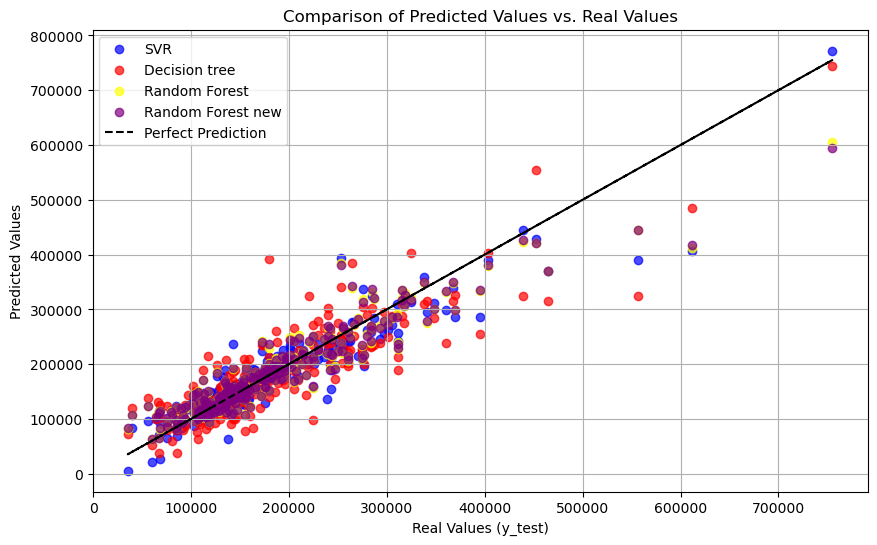

In [33]:
import matplotlib.pyplot as plt

# Plotting the actual target values (y_test) against the SVR predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, label='SVR', marker='o', color='blue', alpha=0.7)

# Add Decision Tree predictions
plt.scatter(y_test, y_pred_decision_tree, label='Decision tree', marker='o', color='red', alpha=0.7)

# Adding Random Forest predictions
plt.scatter(y_test, y_pred_random_forest, label='Random Forest', marker='o', color='yellow', alpha=0.7)

plt.scatter(y_test, y_pred_random_forest_new , label='Random Forest new', marker='o', color='purple', alpha=0.7)

# Plotting the perfect prediction line (y_test = y_test)
plt.plot(y_test, y_test, 'k--', label='Perfect Prediction')

# Adding labels and legend
plt.xlabel("Real Values (y_test)")
plt.ylabel("Predicted Values")
plt.title("Comparison of Predicted Values vs. Real Values")
plt.legend()
plt.grid()

# Display the plot
plt.show()


References

* https://www.google.com/search?q=decision+tree+algorithm&sca_esv=572530057&biw=1536&bih=707&tbm=vid&sxsrf=AM9HkKn2OLtD25h_k9-65mPCVRoOifFNZA%3A1697030869036&ei=1aImZZLpAeyF0PEP3fitgAI&oq=dec&gs_lp=Eg1nd3Mtd2l6LXZpZGVvIgNkZWMqAggAMggQABiKBRiRAjIHEAAYigUYQzIIEAAYigUYkQIyBxAAGIoFGEMyBRAAGIAEMgUQABiABDIFEAAYgAQyBRAAGIAEMggQABiABBixAzIFEAAYgARIhxRQhgZY4AlwAXgAkAEAmAGJAaAB7AOqAQMzLjK4AQPIAQD4AQHCAgQQIxgnwgIGEAAYFhgewgIIEAAYigUYhgPCAgsQABiKBRixAxiDAcICCxAAGIAEGLEDGIMBiAYB&sclient=gws-wiz-video#fpstate=ive&vld=cid:3863e517,vid:_L39rN6gz7Y,st:0


* https://www.youtube.com/watch?v=_L39rN6gz7Y&ab_channel=StatQuestwithJoshStarmer
* https://www.kaggle.com/code/vincentbrunner/ml-from-scratch-decision-trees